In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('collegePlace.csv')

In [3]:
df.shape

(2966, 8)

In [4]:
df.head()

,Age,Gender,Stream,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
0,22,Male,Electronics And Communication,1,8,1,1,1
1,21,Female,Computer Science,0,7,1,1,1
2,22,Female,Information Technology,1,6,0,0,1
3,21,Male,Information Technology,0,8,0,1,1
4,22,Male,Mechanical,0,8,1,0,1


In [5]:
df.describe()

,Age,Internships,CGPA,Hostel,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,21.485840,0.703641,7.073837,0.269049,0.192178,0.552596
std,1.324933,0.740197,0.967748,0.443540,0.394079,0.497310
min,19.000000,0.000000,5.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,6.000000,0.000000,0.000000,0.000000
50%,21.000000,1.000000,7.000000,0.000000,0.000000,1.000000
75%,22.000000,1.000000,8.000000,1.000000,0.000000,1.000000
max,30.000000,3.000000,9.000000,1.000000,1.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2966 entries, 0 to 2965
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                2966 non-null   int64 
 1   Gender             2966 non-null   object
 2   Stream             2966 non-null   object
 3   Internships        2966 non-null   int64 
 4   CGPA               2966 non-null   int64 
 5   Hostel             2966 non-null   int64 
 6   HistoryOfBacklogs  2966 non-null   int64 
 7   PlacedOrNot        2966 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 185.5+ KB


In [7]:
df.isnull().sum()

Age                  0
Gender               0
Stream               0
Internships          0
CGPA                 0
Hostel               0
HistoryOfBacklogs    0
PlacedOrNot          0
dtype: int64

In [8]:
df.columns

Index(['Age', 'Gender', 'Stream', 'Internships', 'CGPA', 'Hostel',
       'HistoryOfBacklogs', 'PlacedOrNot'],
      dtype='object')

In [9]:
df = df.drop(columns=['Age', 'Hostel'])

In [10]:
df['Stream'].unique()

array(['Electronics And Communication', 'Computer Science',
       'Information Technology', 'Mechanical', 'Electrical', 'Civil'],
      dtype=object)

In [11]:
from sklearn import preprocessing

In [12]:
le = preprocessing.LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Stream'] = le.fit_transform(df['Stream'])

In [13]:
df.head()

,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
0,1,3,1,8,1,1
1,0,1,0,7,1,1
2,0,4,1,6,0,1
3,1,4,0,8,1,1
4,1,5,0,8,0,1


In [14]:
df.describe()

,Gender,Stream,Internships,CGPA,HistoryOfBacklogs,PlacedOrNot
count,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000,2966.000000
mean,0.834457,2.562374,0.703641,7.073837,0.192178,0.552596
std,0.371732,1.653853,0.740197,0.967748,0.394079,0.497310
min,0.000000,0.000000,0.000000,5.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,6.000000,0.000000,0.000000
50%,1.000000,3.000000,1.000000,7.000000,0.000000,1.000000
75%,1.000000,4.000000,1.000000,8.000000,0.000000,1.000000
max,1.000000,5.000000,3.000000,9.000000,1.000000,1.000000


In [15]:
df['Stream'].unique()

array([3, 1, 4, 5, 2, 0])

<AxesSubplot: >

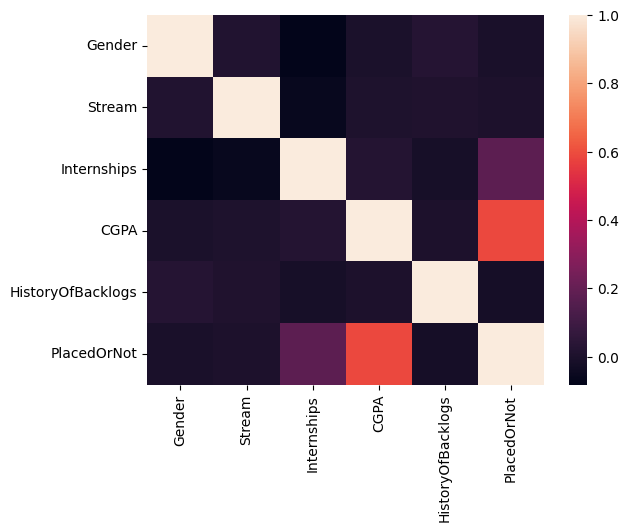

In [16]:
tc = df.corr()
sns.heatmap(tc)

In [17]:
x = df.drop(columns=['PlacedOrNot'])
x

,Gender,Stream,Internships,CGPA,HistoryOfBacklogs
0,1,3,1,8,1
1,0,1,0,7,1
2,0,4,1,6,0
3,1,4,0,8,1
4,1,5,0,8,0
...,...,...,...,...,...
2961,1,4,0,7,0
2962,1,5,1,7,0
2963,1,4,1,7,0
2964,1,1,1,7,0


In [18]:
y = df['PlacedOrNot']
y

0       1
1       1
2       1
3       1
4       1
       ..
2961    0
2962    0
2963    0
2964    0
2965    1
Name: PlacedOrNot, Length: 2966, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=3)

In [20]:
x_train

,Gender,Stream,Internships,CGPA,HistoryOfBacklogs
1529,1,0,1,6,0
97,1,4,0,8,0
357,1,2,0,8,0
1948,1,4,0,7,1
2815,1,4,1,8,1
...,...,...,...,...,...
2304,1,0,0,7,0
968,1,5,0,8,0
1667,1,3,0,7,0
1688,0,3,0,6,0


In [21]:
x_test

,Gender,Stream,Internships,CGPA,HistoryOfBacklogs
1696,1,1,0,6,0
1752,1,5,0,6,1
2370,1,1,1,8,0
2270,1,5,1,6,1
87,1,1,0,6,0
...,...,...,...,...,...
1231,1,2,1,7,0
2258,1,1,0,7,1
2938,1,1,0,7,1
1440,1,4,0,7,1


In [22]:
y_train

1529    0
97      1
357     1
1948    1
2815    1
       ..
2304    0
968     1
1667    0
1688    1
1898    1
Name: PlacedOrNot, Length: 2076, dtype: int64

In [23]:
y_test

1696    0
1752    0
2370    1
2270    0
87      0
       ..
1231    1
2258    1
2938    0
1440    0
591     1
Name: PlacedOrNot, Length: 890, dtype: int64

In [24]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(x_train,y_train)
y_pred = clf.predict(x_test)
y_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,

In [25]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test,y_pred)
cm

array([[383,  13],
       [114, 380]], dtype=int64)

In [26]:
acc = metrics.accuracy_score(y_test,y_pred)
acc

0.8573033707865169

In [27]:
pre = metrics.precision_score(y_test,y_pred)
pre

0.9669211195928753

In [28]:
re = metrics.recall_score(y_test,y_pred)
re

0.7692307692307693

In [29]:
from sklearn.ensemble import RandomForestClassifier

In [30]:
classifier= RandomForestClassifier()
classifier.fit(x_train, y_train)

RandomForestClassifier()

In [31]:
y_pred_rf= classifier.predict(x_test)

In [32]:
y_pred_rf

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,

In [33]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred_rf)
cm

array([[380,  16],
       [110, 384]], dtype=int64)

In [34]:
acc1 = metrics.accuracy_score(y_test,y_pred_rf)
acc1

0.8584269662921349

In [35]:
pre1 = metrics.precision_score(y_test,y_pred_rf)
pre1

0.96

In [36]:
re1 = metrics.recall_score(y_test,y_pred_rf)
re1

0.7773279352226721

In [37]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(x_train, y_train)

LogisticRegression(random_state=0)

In [38]:
y_pred_lr = classifier.predict(x_test)
y_pred_rf

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1,

In [39]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test, y_pred_lr)
cm

array([[309,  87],
       [101, 393]], dtype=int64)

In [40]:
acc2 = metrics.accuracy_score(y_test,y_pred_lr)
acc2

0.7887640449438202

In [41]:
pre2 = metrics.precision_score(y_test,y_pred_lr)
pre2

0.81875

In [42]:
re2 = metrics.recall_score(y_test,y_pred_lr)
re2

0.7955465587044535

In [50]:
print("Decision Tree Accuracy : ",format(acc*100,".2f"),'%')
print("Random Forest Accuracy : ",format(acc1*100,".2f"),'%')
print("Logistic Regression Accuracy : ",format(acc2*100,".2f"),'%')

Decision Tree Accuracy :  85.73 %
Random Forest Accuracy :  85.84 %
Logistic Regression Accuracy :  78.88 %
